In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import ast
plt.style.use('ggplot')

df_games = pd.read_csv('data\df_games_clean.csv')
df_items = pd.read_csv('data\df_items_clean.csv')
df_reviews = pd.read_csv('data\df_reviews_clean.csv')


# Analisis exploratorio de Datos y preparacion para modelado

Para esta etapa voy a seguir una serie de pasos que va a ser exactamente la misma para los 3 dataframes que creamos en el paso1_engineer.ipynb y para finalizar voy a juntarlos en uno unico que mas adelante utilizare en mi modelado de ML.

## 1°. Data Frame ITEMS

### Entiendiendo nuestros datos.

In [6]:
#Vemos el tamaño de nuestro DF
df_items.shape

(5153209, 9)

In [9]:
#hacemos un sampleo aleatorio para ver como esta estructurada nuestra informacion
df_items.sample(10)

,Unnamed: 0,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
4655556,4664452,AfterGl0w,74,76561198065029753,http://steamcommunity.com/id/AfterGl0w,44350.0,GRID 2,136.0,0.0
2207644,2210474,76561198112011170,294,76561198112011170,http://steamcommunity.com/profiles/76561198112...,269270.0,Love,133.0,0.0
1438300,1440057,kanyetothe,164,76561198048428142,http://steamcommunity.com/id/kanyetothe,550.0,Left 4 Dead 2,1249.0,0.0
1129199,1130586,jellyo,62,76561198042294898,http://steamcommunity.com/id/jellyo,270210.0,Melody's Escape,924.0,0.0
1940473,1942845,valkri,100,76561198058659961,http://steamcommunity.com/id/valkri,212160.0,Vindictus,1664.0,0.0
3450644,3455475,76561198024277299,146,76561198024277299,http://steamcommunity.com/profiles/76561198024...,8980.0,Borderlands,0.0,0.0
3550221,3555202,calehill16,34,76561198057432899,http://steamcommunity.com/id/calehill16,280790.0,Creativerse,0.0,0.0
3611145,3616219,tomJ420,337,76561198060127311,http://steamcommunity.com/id/tomJ420,8870.0,BioShock Infinite,597.0,0.0
2068676,2071276,dude2193,170,76561197988419900,http://steamcommunity.com/id/dude2193,209630.0,Magrunner: Dark Pulse,135.0,0.0
3287324,3291879,SlapstickGhost,201,76561197994104666,http://steamcommunity.com/id/SlapstickGhost,271670.0,10 Second Ninja,8.0,0.0


In [11]:
#nombres de las columnas, en este paso es donde iba a normalizar los nombre pero todo parece seguir
#una misma convencion
df_items.columns

Index(['Unnamed: 0', 'user_id', 'items_count', 'steam_id', 'user_url',
       'item_id', 'item_name', 'playtime_forever', 'playtime_2weeks'],
      dtype='object')

In [10]:
#tipos de los datos, tambien todo parece bien. Aparentemente la persona que se encargo 
#del data engineering hizo un trabajo decente (guiño guiño)
df_items.dtypes

Unnamed: 0            int64
user_id              object
items_count           int64
steam_id              int64
user_url             object
item_id             float64
item_name            object
playtime_forever    float64
playtime_2weeks     float64
dtype: object

### Preparacion de Datos

In [14]:
#vemos que tenemos algunas columnas que en este momento 
# no necesitamos por que son equivalentes user_url, steam_id y user_id hacen 
# referencia a lo mismo, si embargo por ahora no voy a eliminarlos ya que los 
# voy a necesitar mas adelante
#la unica columna que voy a eliminar que me puede entorpecer es "Unnamed: 0" (de nuevo)
df_items.sample(3)

,Unnamed: 0,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
2671503,2675092,76561197988506370,412,76561197988506370,http://steamcommunity.com/profiles/76561197988...,238370.0,Magicka 2,0.0,0.0
1290550,1292146,mjoz,699,76561198001368533,http://steamcommunity.com/id/mjoz,203630.0,Warlock - Master of the Arcane,0.0,0.0
986838,988057,Frogpro007,104,76561198123590627,http://steamcommunity.com/id/Frogpro007,458300.0,CS:GO Player Profiles: fnx - Luminosity,0.0,0.0


In [18]:
df_items.drop(columns=["Unnamed: 0"], inplace=True)

In [19]:
#intentando identificar si aun tenemos valores faltantes. 
df_items.isna().sum()

user_id             0
items_count         0
steam_id            0
user_url            0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64

In [21]:
#intentando identificar si tenemos tenemos valores duplicados. 

df_items.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
5153204    False
5153205    False
5153206    False
5153207    False
5153208    False
Length: 5153209, dtype: bool

### Buscando caracteristicas en nustros DF

Intentamos hacer un analisis un poco mas visual y descriptivo que nos de una aproximacion de lo que tenemos dentro de nuestro df

In [39]:
df_items["item_name"].value_counts()

item_name
Dota 2 Test                            49571
Counter-Strike: Global Offensive       43776
Garry's Mod                            43301
Unturned                               38682
Left 4 Dead 2                          37044
                                       ...  
My Own Pet                                 1
Medieval Battlefields Black Edition        1
Football VR                                1
Tower Dwellers                             1
Arachnophobia                              1
Name: count, Length: 10947, dtype: int64

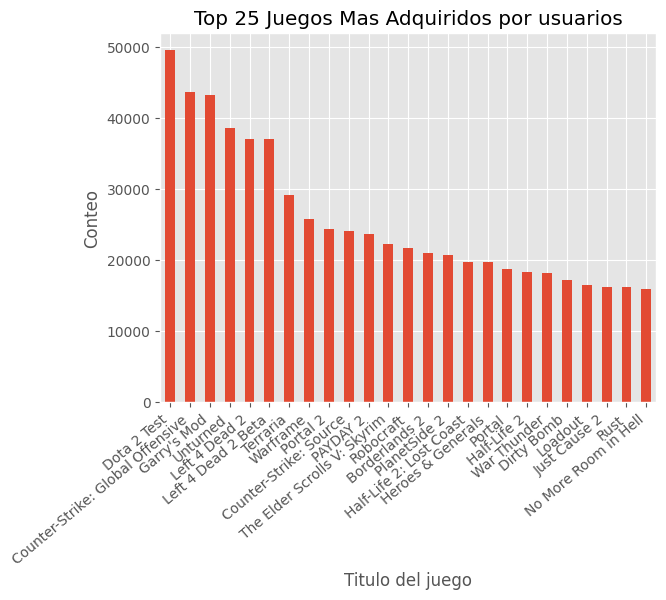

In [85]:
ax = df_items["item_name"].value_counts()\
    .head(25)\
    .plot(kind='bar', title = 'Top 25 Juegos Mas Adquiridos por usuarios')
ax.set_xlabel('Titulo del juego')
ax.set_ylabel('Conteo')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.show()

In [78]:
df = pd.DataFrame({"item_name": df_items["item_name"], "playtime_forever" : df_items["playtime_forever"].astype('int32')})


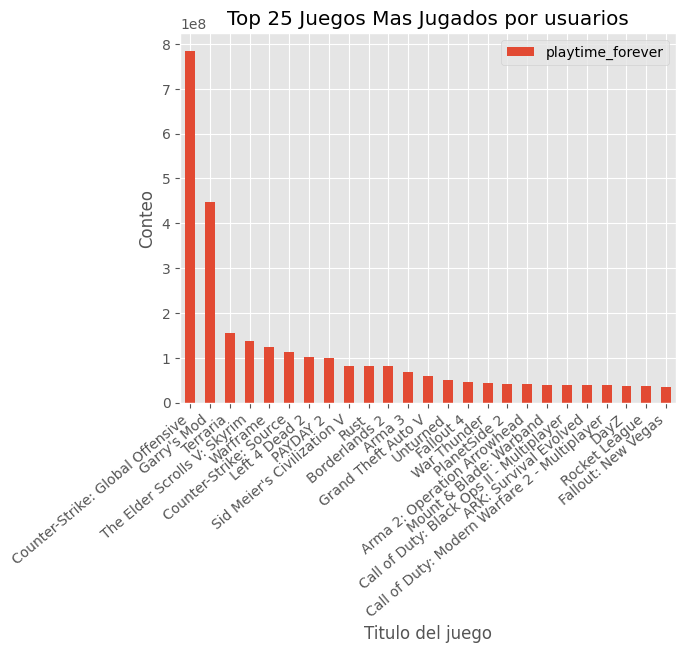

In [84]:
ax = pd.DataFrame(df.groupby('item_name')['playtime_forever']\
    .sum()).sort_values(by="playtime_forever", ascending=False)\
    .head(25)\
    .plot(kind='bar', title = 'Top 25 Juegos Mas Jugados por usuarios')
ax.set_xlabel('Titulo del juego')
ax.set_ylabel('Conteo')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.show()


## 2°. Data Frame REVIEWS

### Entendiendo nuestros datos

In [86]:
#Vemos el tamaño de nuestro DF
df_reviews.shape

(59305, 6)

In [87]:
#hacemos un sampleo aleatorio para ver como esta estructurada nuestra informacion
df_reviews.sample(10)

,user_id,user_url,posted,item_id,recommend,sentimiento
4119,themlgayylamo,http://steamcommunity.com/id/themlgayylamo,NaN,319510.0,False,1
24166,76561198216102928,http://steamcommunity.com/profiles/76561198216...,NaN,107410.0,True,2
37785,evolic,http://steamcommunity.com/id/evolic,NaN,437220.0,True,2
13535,isdonisbest,http://steamcommunity.com/id/isdonisbest,NaN,268500.0,True,2
31504,76561198096849086,http://steamcommunity.com/profiles/76561198096...,2014-07-01,6550.0,True,0
52456,hilmanhambali,http://steamcommunity.com/id/hilmanhambali,2013-05-11,227300.0,True,2
58536,76561198127489966,http://steamcommunity.com/profiles/76561198127...,2014-04-15,265930.0,True,2
33789,76561198084656191,http://steamcommunity.com/profiles/76561198084...,2014-11-09,218620.0,True,1
3101,TheLifeAndTimesOfTim,http://steamcommunity.com/id/TheLifeAndTimesOfTim,2015-11-19,65780.0,True,2
20702,wavewizard,http://steamcommunity.com/id/wavewizard,2014-06-19,104900.0,True,2


In [90]:
#nombres de las columnas
df_reviews.columns

Index(['user_id', 'user_url', 'posted', 'item_id', 'recommend', 'sentimiento'], dtype='object')

In [92]:
#posted deveria ser un datetime, no un object
df_reviews.dtypes

user_id         object
user_url        object
posted          object
item_id        float64
recommend         bool
sentimiento      int64
dtype: object

In [95]:
df_reviews["posted"] = pd.to_datetime(df_reviews["posted"])

In [96]:
df_reviews.dtypes

user_id                object
user_url               object
posted         datetime64[ns]
item_id               float64
recommend                bool
sentimiento             int64
dtype: object

### Preparacion de Datos


In [100]:
#encontramos algo similar con respecto al df anterior, user_id y user_url son referenciales a lo mismo. Por ahora los vamos a dejar.
df_reviews.sample(3)

,user_id,user_url,posted,item_id,recommend,sentimiento
24948,ArchyRival,http://steamcommunity.com/id/ArchyRival,2015-10-05,730.0,False,0
21032,76561198068696167,http://steamcommunity.com/profiles/76561198068...,2015-01-19,109400.0,True,2
10887,Deus_VuIt,http://steamcommunity.com/id/Deus_VuIt,2015-03-11,48700.0,True,2


In [102]:
#intentando identificar si aun tenemos valores faltantes. 
df_reviews.isna().sum()

user_id            0
user_url           0
posted         10119
item_id            0
recommend          0
sentimiento        0
dtype: int64

Los nulos constituyen casi un 20% del total de los datos de la columna de fecha, lo cual dificulta un poco el analisis. 
En este caso voy a eliminar la columna ya que no la necesito para hacer mi modelado y no me va a aportar un valor significativo. 
Si en vez de eliminar la columna, elimino las filas que contienen nulos, me quedo con los datos de la fecha que fuero posteados pero pierdo mucha informacion valiosa sobre todo en la columna recommend y sentimiento


Recuerdo que ya tengo mis datos preprosesados para responder las consultas de la APIs. Este EDA va dirigido principalmente al modelado

In [104]:
df_reviews.drop(columns=['posted'], inplace= True)

In [114]:
df_reviews.sample(3)

,user_id,user_url,item_id,recommend,sentimiento
39118,76561198044023118,http://steamcommunity.com/profiles/76561198044...,433850.0,False,1
22107,76561198073222743,http://steamcommunity.com/profiles/76561198073...,42960.0,True,2
49761,76561198058598393,http://steamcommunity.com/profiles/76561198058...,263440.0,True,2


### Buscando caracteristicas en nustros DF

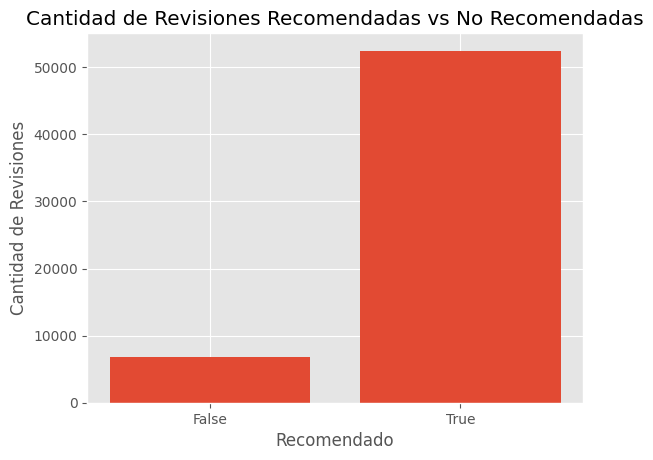

In [133]:
ax =  df_reviews['recommend'].value_counts()
plt.bar(recommend_counts.index, recommend_counts.values)
plt.xlabel('Recomendado')
plt.ylabel('Cantidad de Revisiones')
plt.xticks([False, True], ['False', 'True'])
plt.title('Cantidad de Revisiones Recomendadas vs No Recomendadas')
plt.show()



In [155]:
#hacemos un copy del df_reviews para no hacer macana
df = df_reviews.copy()
df['sentimiento'] = df['sentimiento'].map({0: 'negativo', 1: 'neutral', 2: 'positivo'})
sentimiento_counts = df['sentimiento'].value_counts()

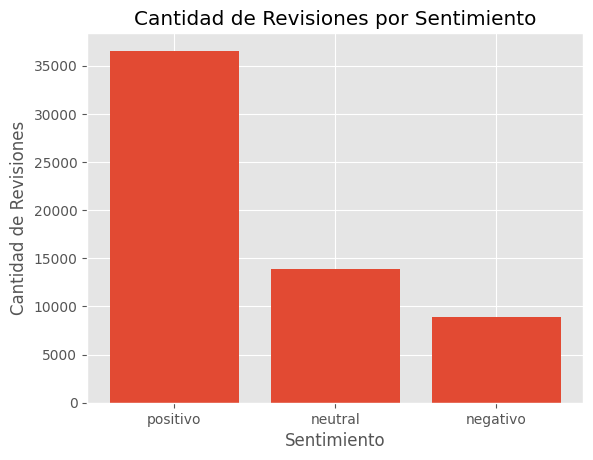

In [159]:
plt.bar(sentimiento_counts.index, sentimiento_counts.values)
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Revisiones')
plt.title('Cantidad de Revisiones por Sentimiento')
plt.show()


## 3°. Data Frame GAMES

In [160]:
#Vemos el tamaño de nuestro DF
df_games.shape

(31824, 12)

In [161]:
#hacemos un sampleo aleatorio para ver como esta estructurada nuestra informacion
df_games.sample(10)

,genres,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer,atributos
15625,"['Casual', 'Indie', 'Simulation', 'Strategy']",Draw Souls,http://store.steampowered.com/app/677030/Draw_...,2017-09-08,"['Indie', 'Strategy', 'Casual', 'Simulation']",http://steamcommunity.com/app/677030/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",3.99,0.0,677030.0,Hio Giang,"['Casual', 'Strategy', 'Simulation', 'Indie', ..."
6381,"['Casual', 'Free to Play', 'Simulation', 'Spor...",Zaccaria Pinball - Circus Table,http://store.steampowered.com/app/478056/Zacca...,2016-06-16,"['Free to Play', 'Casual', 'Simulation', 'Spor...",http://steamcommunity.com/app/478056/reviews/?...,"['Single-player', 'Shared/Split Screen', 'Cros...",1.99,0.0,478056.0,Magic Pixel Kft.,"['Casual', 'Steam Trading Cards', 'Full contro..."
3423,"['Action', 'Adventure', 'Indie']",Sun Blast: Star Fighter,http://store.steampowered.com/app/344910/Sun_B...,2015-04-02,"['Action', ""Shoot 'Em Up"", 'Indie', 'Anime', '...",http://steamcommunity.com/app/344910/reviews/?...,"['Single-player', 'Steam Achievements', 'Full ...",1.99,0.0,344910.0,OBLONE Software,"['Anime', 'Fantasy', 'Difficult', 'Family Frie..."
27860,"['Casual', 'Simulation']",Rocksmith® 2014 – The Killers - “Spaceman”,http://store.steampowered.com/app/295038/Rocks...,2014-10-28,"['Casual', 'Simulation']",http://steamcommunity.com/app/295038/reviews/?...,"['Single-player', 'Shared/Split Screen', 'Down...",2.99,0.0,295038.0,Ubisoft - San Francisco,"['Casual', 'Partial Controller Support', 'Stea..."
16770,['Simulation'],FSX Steam Edition: McDonnell Douglas DC-10™,http://store.steampowered.com/app/556222/FSX_S...,2017-07-06,['Simulation'],http://steamcommunity.com/app/556222/reviews/?...,"['Single-player', 'Multi-player', 'Downloadabl...",29.99,0.0,556222.0,Just Flight,"['Partial Controller Support', 'Simulation', '..."
22183,"['Adventure', 'Casual', 'Free to Play', 'Indie...",Insanity Clicker - Collection Pack,http://store.steampowered.com/app/498790/Insan...,2016-07-08,"['Strategy', 'Indie', 'Simulation', 'Casual', ...",http://steamcommunity.com/app/498790/reviews/?...,"['Single-player', 'Downloadable Content', 'In-...",19.99,0.0,498790.0,PlayFlock,"['Casual', 'Adventure', 'Strategy', 'Simulatio..."
30152,"['Casual', 'Simulation']",Rocksmith - Santana Feat Rob Thomas - Smooth,http://store.steampowered.com/app/222071/Rocks...,2013-01-08,"['Casual', 'Simulation']",http://steamcommunity.com/app/222071/reviews/?...,"['Single-player', 'Shared/Split Screen', 'Down...",2.99,0.0,222071.0,Ubisoft - San Francisco,"['Casual', 'Shared/Split Screen', 'Simulation'..."
13033,"['Adventure', 'Indie', 'RPG']",Finding Paradise Soundtrack,http://store.steampowered.com/app/770780/Findi...,2021-12-31,"['Adventure', 'RPG', 'Indie']",http://steamcommunity.com/app/770780/reviews/?...,"['Single-player', 'Downloadable Content']",4.99,0.0,770780.0,Freebird Games,"['Adventure', 'Indie', 'RPG', 'Single-player',..."
16780,['Indie'],Pixel Pursuit,http://store.steampowered.com/app/659320/Pixel...,2017-07-06,"['Indie', 'Platformer', 'Pixel Graphics']",http://steamcommunity.com/app/659320/reviews/?...,"['Single-player', 'Partial Controller Support']",5.99,0.0,659320.0,Omnichron Studios,"['Partial Controller Support', 'Platformer', '..."
26236,"['Indie', 'Strategy']",UFHO2 - Game Soundtrack,http://store.steampowered.com/app/373450/UFHO2...,2014-04-01,"['Strategy', 'Indie']",http://steamcommunity.com/app/373450/reviews/?...,"['Single-player', 'Shared/Split Screen', 'Down...",0.00,0.0,373450.0,"Tiny Colossus,Ciro Continisio,Francesco D'Andrea","['Steam Trading Cards', 'Stats', 'Shared/Split..."


In [163]:
#primera observacion, id refiere a item_id.
#tambien tenemos la columna que cree antes de atributos con la union de genres, specs y tags.

df_games.columns

Index(['genres', 'title', 'url', 'release_date', 'tags', 'reviews_url',
       'specs', 'price', 'early_access', 'id', 'developer', 'atributos'],
      dtype='object')

### Preparacion de Datos

In [2]:
#voy a eliminar las columnas de specs, genres y tags para hacer el modelado y con la columna atributos voy a generar dummies.

df_games.rename(columns= {'id' : "item_id"}, inplace=True)

In [3]:
df_games.drop(columns=["genres","tags","specs"], inplace=True)

In [4]:
df_games.head(1)

,title,url,release_date,reviews_url,price,early_access,item_id,developer,atributos
0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,4.99,0.0,761140.0,Kotoshiro,"['Casual', 'Strategy', 'Simulation', 'Indie', ..."


In [5]:
#Hay que acomodar algunos tipos de datos como "early_access", "release_date" y transformar a dummies "atributos"
df_games.dtypes

title            object
url              object
release_date     object
reviews_url      object
price           float64
early_access    float64
item_id         float64
developer        object
atributos        object
dtype: object

In [6]:
df_games['release_date'] = df_games['release_date'].replace("NoData", np.nan)
df_games['release_date'] = pd.to_datetime(df_games['release_date'])
df_games["early_access"] = df_games["early_access"].astype(bool)

In [7]:
df_games.dtypes

title                   object
url                     object
release_date    datetime64[ns]
reviews_url             object
price                  float64
early_access              bool
item_id                float64
developer               object
atributos               object
dtype: object

In [8]:
#hago otro df antes de hacer macana
df_prueba = df_games.copy()

In [9]:
df_prueba.reset_index(inplace=True)

In [10]:
df_prueba['atributos'] = df_prueba['atributos'].apply(ast.literal_eval)

In [11]:
df_prueba = df_prueba.explode("atributos")

In [12]:
df_prueba

,index,title,url,release_date,reviews_url,price,early_access,item_id,developer,atributos
0,0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140.0,Kotoshiro,Casual
0,0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140.0,Kotoshiro,Strategy
0,0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140.0,Kotoshiro,Simulation
0,0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140.0,Kotoshiro,Indie
0,0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140.0,Kotoshiro,Single-player
...,...,...,...,...,...,...,...,...,...,...
31823,31823,Maze Run VR,http://store.steampowered.com/app/681550/Maze_...,NaT,http://steamcommunity.com/app/681550/reviews/?...,4.99,True,681550.0,NoData,Indie
31823,31823,Maze Run VR,http://store.steampowered.com/app/681550/Maze_...,NaT,http://steamcommunity.com/app/681550/reviews/?...,4.99,True,681550.0,NoData,Single-player
31823,31823,Maze Run VR,http://store.steampowered.com/app/681550/Maze_...,NaT,http://steamcommunity.com/app/681550/reviews/?...,4.99,True,681550.0,NoData,Action
31823,31823,Maze Run VR,http://store.steampowered.com/app/681550/Maze_...,NaT,http://steamcommunity.com/app/681550/reviews/?...,4.99,True,681550.0,NoData,Room-Scale


In [14]:
df_prueba = pd.concat([df_prueba, pd.get_dummies(df_prueba['atributos'])], axis = 1)

In [17]:
df_prueba

,index,title,url,release_date,reviews_url,price,early_access,item_id,developer,atributos,...,Web Publishing,Werewolves,Western,Windows Mixed Reality,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140.0,Kotoshiro,Casual,...,False,False,False,False,False,False,False,False,False,False
0,0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140.0,Kotoshiro,Strategy,...,False,False,False,False,False,False,False,False,False,False
0,0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140.0,Kotoshiro,Simulation,...,False,False,False,False,False,False,False,False,False,False
0,0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140.0,Kotoshiro,Indie,...,False,False,False,False,False,False,False,False,False,False
0,0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140.0,Kotoshiro,Single-player,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31823,31823,Maze Run VR,http://store.steampowered.com/app/681550/Maze_...,NaT,http://steamcommunity.com/app/681550/reviews/?...,4.99,True,681550.0,NoData,Indie,...,False,False,False,False,False,False,False,False,False,False
31823,31823,Maze Run VR,http://store.steampowered.com/app/681550/Maze_...,NaT,http://steamcommunity.com/app/681550/reviews/?...,4.99,True,681550.0,NoData,Single-player,...,False,False,False,False,False,False,False,False,False,False
31823,31823,Maze Run VR,http://store.steampowered.com/app/681550/Maze_...,NaT,http://steamcommunity.com/app/681550/reviews/?...,4.99,True,681550.0,NoData,Action,...,False,False,False,False,False,False,False,False,False,False
31823,31823,Maze Run VR,http://store.steampowered.com/app/681550/Maze_...,NaT,http://steamcommunity.com/app/681550/reviews/?...,4.99,True,681550.0,NoData,Room-Scale,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_prueba